In [15]:
import tensorflow as tf 
import os 
import matplotlib.pyplot as plt 
import numpy as np
import cv2

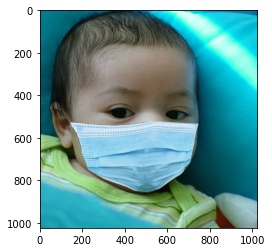

In [16]:
Datadirectory = "Dataset/" ## Folder destination
Classes = ["Mask","No_Mask"] ## list of classes 
for category in Classes:
    path = os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

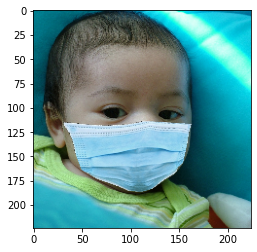

In [17]:
img_size= 224 ## Image size is 224 X 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array, cv2.COLOR_BGR2RGB))
plt.show()

# Reading and converting the images into array 

In [18]:
training_Data=[] ##data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category) ## 0 , 1 ## Label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array= cv2.resize(img_array, (img_size,img_size))
                training_Data.append([new_array,class_num])
            except Exception as e:
                    pass

In [19]:
create_training_Data()

In [20]:
print(len(training_Data))

2912


In [21]:
import random

random.shuffle(training_Data)

In [22]:
X = []
y = []

for features,label in training_Data:
    X.append(features)
    y.append(label)
    
    
X = np.array(X).reshape(-1, img_size,img_size, 3)

In [23]:
X.shape

(2912, 224, 224, 3)

In [24]:
X= X/255.0; ## normalize the img

In [26]:
y[0]

1

In [27]:
Y = np.array(y)

In [28]:
import pickle
 
    
pickle_out= open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out= open("y.pickle", "wb")
pickle.dump(y,pickle_out)
pickle_out.close()

In [29]:
pickle_in = open("X.pickle", "rb")
X= pickle.load(pickle_in)

pickle_in = open("y.pickle", "rb")
y= pickle.load(pickle_in)

# Transfer learning Model

In [30]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers

In [31]:
model = tf.keras.applications.mobilenet.MobileNet()

# Transfer Learning - tuning , weigth will start from last check point

In [32]:
base_input = model.layers[0].input

In [33]:
base_output = model.layers[-4].output

In [34]:
Flat_layer= layers.Flatten()(base_output)
final_output= layers.Dense(1)(Flat_layer)
final_output= layers.Activation('sigmoid')(final_output)

In [35]:
new_model = keras.Model(inputs = base_input , outputs= final_output)

In [36]:
new_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)      128       
_________________________________________________________________
conv_dw_1_relu (ReLU)        (None, 112, 112, 32)      0     

# setting for binary classification (face mask/without mask)

In [37]:
new_model.compile(loss="binary_crossentropy", optimizer = "adam" , metrics = ["accuracy"])

In [38]:
new_model.fit(X,Y, epochs = 1 ,validation_split = 0.1)

82/82 [==============================] - 225s 3s/step - loss: 0.0163 - accuracy: 0.9905 - val_loss: 0.0890 - val_accuracy: 0.9932


In [39]:
new_model.save("my_model.h5")

In [40]:
new_model = tf.keras.models.load_model("my_model.h5")

# checking the network for prediction

In [41]:
frame = cv2.imread('lady.jpg')

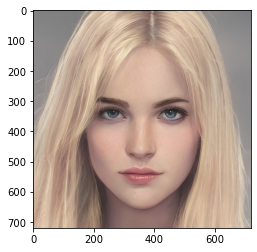

In [42]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [43]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [44]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [45]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    if len(facess) == 0:
        print("Face Not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex:ex + ew]

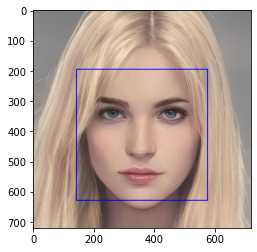

In [46]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [47]:
final_image = cv2.resize(face_roi, (224,224))
final_image = np.expand_dims(final_image, axis = 0)
final_image = final_image/255.0

In [48]:
Predictions = new_model.predict(final_image)

In [49]:
Predictions

array([[1.]], dtype=float32)

In [54]:
import winsound
frequency = 2500
duration = 1000

import cv2
path = "haarcascade_frontalface_default.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_SIMPLEX

rectangle_bgr= (255,255,255)
img= np.zeros ((500,500))
text = "Some text in a box!"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]##width and heigth of text box
text_offset_x = 10
text_offset_y = img.shape[0] - 25
# make the coords of box with small padding of two pixwels
box_coords = ((text_offset_x, text_offset_y), (text_offset_x + text_width + 2, text_offset_y - text_height - 2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img, text, (text_offset_x, text_offset_y), font, fontScale= font_scale, color=(0, 0, 0), thickness=1)

cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
    
while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        facess = faceCascade.detectMultiScale(roi_gray)
        if len(facess) == 0:
           print("Not Detected")
        else:
            for (ex,ey,ew,eh) in facess:
                face_roi = roi_color[ey: ey+eh, ex:ex + ew] #cropping the faces
                
                
    final_image = cv2.resize(face_roi, (224,224))
    final_image = np.expand_dims(final_image, axis = 0)
    final_image = final_image/255.0
    
    font = cv2.FONT_HERSHEY_PLAIN
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    
    if (Predictions<1):
        status = "MASK"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1+w1 , y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,255,0), 2)
        
        cv2.putText(frame,status,(100, 150), font, 3,(0,255,0),2,cv2.LINE_4)
        
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,255,0))
        winsound.Beep(frequency, duration)
        
    else:
        status = "NO MASK"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1, x1), (x1+w1 , y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1 + int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        
        cv2.putText(frame,status,(100, 150), font, 3,(0,0,255),2,cv2.LINE_4)
        
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0,0,255))
      
    
    cv2.imshow('Face Mask Project',frame)
    
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
        
cap.release()
cv2.destroyAllWindows()        

Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
Not Detected
